In [1]:
PV=5000 # Amount of loan borrowed
n=5 # Term of the loan
r=.07 # Annual interest rate

In [2]:
def calculate_yearly_payments(PV,n,r):
    output= (PV*r)/(((1/(1+r)**n))-1)  # formula calculated using sum of infinite GP series
    return output

In [4]:
import pandas as pd

In [13]:
def generate_amortization_schedule(PV,n,r):
    yearly_payment = calculate_yearly_payments(PV,n,r)
    schedule=[]
    balance=PV
    for year in range(1,n):
        interest_payment = balance * r
        principal_payment = yearly_payment - interest_payment
        balance = principal_payment
        schedule.append({
            'Year' : year,
            'Payment' : yearly_payment,
            'Principal' : principal_payment,
            'Interest' : interest_payment,
            'Balance' : balance     
        })
    return pd.DataFrame(schedule) 

In [14]:
PV=5000
n=5
r=0.07
amortization_schedule = generate_amortization_schedule(PV,n,r)

print(amortization_schedule)

   Year      Payment    Principal    Interest      Balance
0     1 -1219.453472 -1569.453472  350.000000 -1569.453472
1     2 -1219.453472 -1109.591729 -109.861743 -1109.591729
2     3 -1219.453472 -1141.782051  -77.671421 -1141.782051
3     4 -1219.453472 -1139.528729  -79.924744 -1139.528729


In [15]:
amortization_schedule

,Year,Payment,Principal,Interest,Balance
0,1,-1219.453472,-1569.453472,350.000000,-1569.453472
1,2,-1219.453472,-1109.591729,-109.861743,-1109.591729
2,3,-1219.453472,-1141.782051,-77.671421,-1141.782051
3,4,-1219.453472,-1139.528729,-79.924744,-1139.528729


In [16]:
import pandas as pd

# Initialize the paramaters of the loan
loan_amount = 18000
apr = 5.29
loan_term = 60

# Get a monthly percentage rate
apr /= 100
mpr = apr / 12

# Calculate the Monthly Payment for a loan
monthly_payment = (loan_amount * mpr)/(1-(1+mpr) ** -loan_term)

def make_payment(principal, mpr, monthly_payment):
    '''Makes a 'payment' by subtracting and updated payment amount from the 
    principal. Returns the principal remaining, and the amount of principal and interest paid
    '''

    current_interest_payment = principal * mpr
    current_principal_payment = monthly_payment - current_interest_payment
    
    principal -= current_principal_payment
    
    return [round(principal, 2), round(current_principal_payment, 2), round(current_interest_payment, 2)] 

def main(principal, term_remaining, monthly_payment, mpr):
    '''Returns an Amortization Table in the form of a DataFrame
    '''
    
    payments = [[principal, 0, 0, 0]]
    total_interest = 0
    
    while principal > 0 and term_remaining > 0:
        payment = make_payment(principal, mpr, monthly_payment)
        principal = payment[0]
        term_remaining -= 1
        total_interest += payment[2]
        payment.append(total_interest)
        payments.append(payment)

    amortization_table = pd.DataFrame(data=payments,
                                      columns=['Principal Remaining',
                                              'Current Principal Payment',
                                              'Current Interest Payment',
                                              'Total Interest Paid'])
    return amortization_table


In [17]:
main(loan_amount, loan_term, monthly_payment, mpr)

,Principal Remaining,Current Principal Payment,Current Interest Payment,Total Interest Paid
0,18000.00,0.00,0.00,0.00
1,17737.27,262.73,79.35,79.35
2,17473.38,263.89,78.19,157.54
3,17208.33,265.05,77.03,234.57
4,16942.11,266.22,75.86,310.43
...,...,...,...,...
56,1353.36,334.64,7.44,2509.79
57,1017.25,336.11,5.97,2515.76
58,679.66,337.59,4.48,2520.24
59,340.58,339.08,3.00,2523.24


In [18]:
import pandas as pd

def calculate_loan_schedule(loan_amount, annual_interest_rate, loan_term_months, monthly_prepayment):
    monthly_interest_rate = annual_interest_rate / 12 / 100
    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** loan_term_months) / (
            (1 + monthly_interest_rate) ** loan_term_months - 1)

    schedule = []
    remaining_balance = loan_amount

    original_loan_amount = loan_amount
    original_loan_term_months = loan_term_months

    for month in range(1, loan_term_months + 1):
        interest_payment = remaining_balance * monthly_interest_rate
        principal_payment = monthly_payment - interest_payment

        if month <= 8 * 12:  # Apply prepayments only for the first 5 years
            remaining_balance -= (monthly_payment + monthly_prepayment - interest_payment)
        else:
            remaining_balance -= (monthly_payment - interest_payment)

        if remaining_balance <= 0:
            # Loan is fully paid, no need to continue calculating the schedule
            loan_term_months = month
            break

        schedule.append({
            'Month': month,
            'Monthly Payment': monthly_payment,
            'Interest Payment': interest_payment,
            'Principal Payment': principal_payment,
            'Prepayment': monthly_prepayment if month <= 8 * 12 else 0,
            'Remaining Balance': max(0, remaining_balance)  # Ensure balance doesn't go negative
        })

    # Calculate total interest savings and total tenure reduced
    original_interest = (monthly_payment * original_loan_term_months) - original_loan_amount
    new_interest = (monthly_payment * loan_term_months) - loan_amount
    interest_savings = original_interest - new_interest
    tenure_reduced_months = original_loan_term_months - loan_term_months

    summary = {
        'Total Interest Savings': interest_savings,
        'Total Tenure Reduced (months)': tenure_reduced_months
    }

    return schedule, summary


In [19]:
loan_amount = 10600000  # Replace with your loan amount
annual_interest_rate = 9.0  # Replace with your annual interest rate
loan_term_years = 30  # Replace with your loan term in years
monthly_prepayment = 50000  # Replace with your monthly prepayment amount

loan_term_months = loan_term_years * 12

schedule, summary = calculate_loan_schedule(loan_amount, annual_interest_rate, loan_term_months, monthly_prepayment)

# Create a DataFrame from the loan schedule
df = pd.DataFrame(schedule)

# Export DataFrame to Excel
output_file = 'loan_schedule.xlsx'
df.to_excel(output_file, index=False)

# Display summary
print(f"Loan schedule has been generated and exported to '{output_file}'.")
print("Summary:")
print(summary)

Loan schedule has been generated and exported to 'loan_schedule.xlsx'.
Summary:
{'Total Interest Savings': 19275539.411529183, 'Total Tenure Reduced (months)': 226}


In [23]:
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import matplotlib

In [29]:
def amortization_table(interest_rate, years, payments_year, principal, addl_principal=0, start_date=date.today()):
    """ Calculate the amortization schedule given the loan details
    
     Args:
        interest_rate: The annual interest rate for this loan
        years: Number of years for the loan
        payments_year: Number of payments in a year
        principal: Amount borrowed
        addl_principal (optional): Additional payments to be made each period. Assume 0 if nothing provided.
                                   must be a value less then 0, the function will convert a positive value to
                                   negative
        start_date (optional): Start date. Will start on first of next month if none provided

    Returns:
        schedule: Amortization schedule as a pandas dataframe
        summary: Pandas dataframe that summarizes the payoff information
    """
    # Ensure the additional payments are negative
    if addl_principal > 0:
        addl_principal = -addl_principal
    
    # Create an index of the payment dates
    rng = pd.date_range(start_date, periods=years * payments_year, freq='MS')
    rng.name = "Payment_Date"
    
    # Build up the Amortization schedule as a DataFrame
    df = pd.DataFrame(index=rng,columns=['Payment', 'Principal', 'Interest', 
                                         'Addl_Principal', 'Curr_Balance'], dtype='float')
    
    # Add index by period (start at 1 not 0)
    df.reset_index(inplace=True)
    df.index += 1
    df.index.name = "Period"
    
    # Calculate the payment, principal and interests amounts using built in Numpy functions
    per_payment = npf.pmt(interest_rate/payments_year, years*payments_year, principal)
    df["Payment"] = per_payment
    df["Principal"] = npf.ppmt(interest_rate/payments_year, df.index, years*payments_year, principal)
    df["Interest"] = npf.ipmt(interest_rate/payments_year, df.index, years*payments_year, principal)
        
    # Round the values
    df = df.round(2) 
    
    # Add in the additional principal payments
    df["Addl_Principal"] = addl_principal
    
    # Store the Cumulative Principal Payments and ensure it never gets larger than the original principal
    df["Cumulative_Principal"] = (df["Principal"] + df["Addl_Principal"]).cumsum()
    df["Cumulative_Principal"] = df["Cumulative_Principal"].clip(lower=-principal)
    
    # Calculate the current balance for each period
    df["Curr_Balance"] = principal + df["Cumulative_Principal"]
    
    # Determine the last payment date
    try:
        last_payment = df.query("Curr_Balance <= 0")["Curr_Balance"].idxmax(axis=1, skipna=True)
    except ValueError:
        last_payment = df.last_valid_index()
    
    last_payment_date = "{:%m-%d-%Y}".format(df.loc[last_payment, "Payment_Date"])
        
    # Truncate the data frame if we have additional principal payments:
    if addl_principal != 0:
                
        # Remove the extra payment periods
        df = df.loc[0:last_payment].copy()
        
        # Calculate the principal for the last row
        df.loc[last_payment, "Principal"] = -(df.loc[last_payment-1, "Curr_Balance"])
        
        # Calculate the total payment for the last row
        df.loc[last_payment, "Payment"] = df.loc[last_payment, ["Principal", "Interest"]].sum()
        
        # Zero out the additional principal
        df.loc[last_payment, "Addl_Principal"] = 0
        
    # Get the payment info into a DataFrame in column order
    payment_info = (df[["Payment", "Principal", "Addl_Principal", "Interest"]]
                    .sum().to_frame().T)
       
    # Format the Date DataFrame
    payment_details = pd.DataFrame.from_dict(dict([('payoff_date', [last_payment_date]),
                                               ('Interest Rate', [interest_rate]),
                                               ('Number of years', [years])
                                              ]))
    # Add a column showing how much we pay each period.
    # Combine addl principal with principal for total payment
    payment_details["Period_Payment"] = round(per_payment, 2) + addl_principal
    
    payment_summary = pd.concat([payment_details, payment_info], axis=1)
    return df, payment_summary

In [30]:
schedule1, stats1 = amortization_table(0.05, 30, 12, 100000, addl_principal=0)

In [27]:
import numpy_financial as npf

In [28]:
npf.pmt

<function numpy_financial._financial.pmt(rate, nper, pv, fv=0, when='end')>

In [32]:
stats1

,payoff_date,Interest Rate,Number of years,Period_Payment,Payment,Principal,Addl_Principal,Interest
0,02-01-2054,0.05,30,-536.82,-193255.2,-100000.02,0.0,-93255.69


In [35]:
schedule2, stats2 = amortization_table(0.05, 30, 12, 100000, addl_principal=-200)
schedule3, stats3 = amortization_table(0.04, 15, 12, 100000, addl_principal=0)

In [36]:
pd.concat([stats1, stats2, stats3], ignore_index=True)

,payoff_date,Interest Rate,Number of years,Period_Payment,Payment,Principal,Addl_Principal,Interest
0,02-01-2054,0.05,30,-536.82,-193255.20,-100000.02,0.0,-93255.69
1,02-01-2054,0.05,30,-736.82,-192720.61,-99465.43,-71800.0,-93255.69
2,02-01-2039,0.04,15,-739.69,-133144.20,-100000.03,0.0,-33143.85


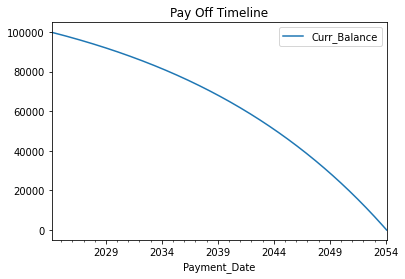

In [33]:
schedule1.plot(x='Payment_Date', y='Curr_Balance', title="Pay Off Timeline");

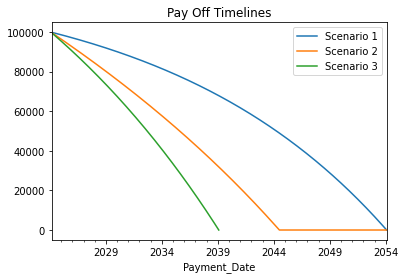

In [37]:
fig, ax = plt.subplots(1, 1)
schedule1.plot(x='Payment_Date', y='Curr_Balance', label="Scenario 1", ax=ax)
schedule2.plot(x='Payment_Date', y='Curr_Balance', label="Scenario 2", ax=ax)
schedule3.plot(x='Payment_Date', y='Curr_Balance', label="Scenario 3", ax=ax)
plt.title("Pay Off Timelines");

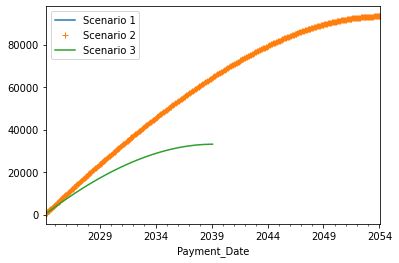

In [38]:
schedule1["Cum_Interest"] = schedule1["Interest"].abs().cumsum()
schedule2["Cum_Interest"] = schedule2["Interest"].abs().cumsum()
schedule3["Cum_Interest"] = schedule3["Interest"].abs().cumsum()

fig, ax = plt.subplots(1, 1)


schedule1.plot(x='Payment_Date', y='Cum_Interest', label="Scenario 1", ax=ax)
schedule2.plot(x='Payment_Date', y='Cum_Interest', label="Scenario 2", ax=ax, style='+')
schedule3.plot(x='Payment_Date', y='Cum_Interest', label="Scenario 3", ax=ax)

ax.legend(loc="best");

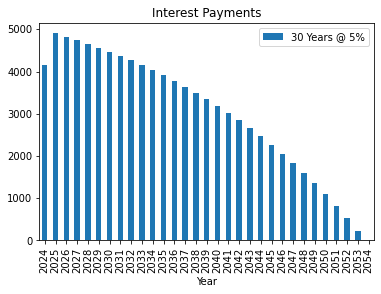

In [39]:
fig, ax = plt.subplots(1, 1)

y1_schedule = schedule1.set_index('Payment_Date').resample("A")["Interest"].sum().abs().reset_index()
y1_schedule["Year"] = y1_schedule["Payment_Date"].dt.year
y1_schedule.plot(kind="bar", x="Year", y="Interest", ax=ax, label="30 Years @ 5%")

plt.title("Interest Payments");